# Assignment 1

#### Due Date: 24th Jan'18

In this assignment we will cover the basics of Machine Learning. We will cover the following topics:

1) Linear Regression

2) Logistic Regression

3) EM Algorithm

4) K-means/Hirarchical Clustering.

It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like scipy), which directly give functions for these algorithms, are to be used. 

## Linear Regression

Defination: Given a data set ${\displaystyle \{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}} $ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y_i$ and the $p$-vector of regressors $x_i$ is linear. This relationship is modeled through a disturbance term or error variable $ε_i$ - an unobserved random variable that adds noise to the linear relationship between the dependent variable and regressors. Thus the model takes the form:

$$ {\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,} $$

where,

$$ \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $$

$$ {\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\top }\\\mathbf {x} _{2}^{\top }\\\vdots \\\mathbf {x} _{n}^{\top }\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}
$$

$$ {\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.} 
$$


For this problem, in the class lecture we covered the Least Square Solution, which can be formulated as:

$${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\top }\mathbf {X} )^{-1}\mathbf {X} ^{\top }\mathbf {y} =\left(\sum \mathbf {x} _{i}\mathbf {x} _{i}^{\top }\right)^{-1}\left(\sum \mathbf {x} _{i}y_{i}\right).} $$

## Question 1

a) You will write the code to find the LSS for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. Few of the possible models are:

$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$


$$ {\displaystyle \mathbf {y} ={\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }},\,} $$

Given this data, find the coefficients for each of these models.

b) Now that you have three models, you must select the best one. Use Cross-validation with 5 folds on the dataset to find the optimal model (On the basis of RMSE on the test partition). 

In [764]:
import numpy as np
# Load the dataset 
train_data = np.load('utils/assign_1_data_1_train.npy')
# now write the code for finding the solution for each of the three models.

In [766]:
# Finally, Write The estimates of the betas here:
def singlevaribaleregression(data, column):
    sx=0 ; sy=0 ; sxx=0 ; syy=0 ; sxy=0;
    n = len(data)
    for i in range(n):
        sx = sx + data[i,column]
        sy = sy + data[i, 0]
        sxx = sxx + data[i,column] * data[i,column]
        syy = syy + data[i,0] * data[i,0]
        sxy = sxy + data[i,column] * data[i,0]
    beta_one = (n*sxy - sx*sy)/(n*sxx - sx*sx)
    beta_zero = (sy-beta_one*sx)/n
    return(beta_zero, beta_one)

def multivariableregression(train_data):
    input_vector = np.delete(train_data,0,1)
    X_vector = np.insert(input_vector, 0, 1, axis=1)
    Y = train_data[:,0]
    X_transpose_Y = np.dot(X_vector.T, Y)
    X_transpose_X = np.dot(X_vector.T, X_vector)
    betas = np.dot(np.linalg.inv(X_transpose_X),X_transpose_Y)
    return betas

# Model 1
[beta_zero, beta_one] = singlevaribaleregression(train_data,1)
print "For Model 1, the beta_zero = " + str(beta_zero)+" and beta_one = "+ str(beta_one)

# Model 2
[beta_zero, beta_two] = singlevaribaleregression(train_data,2)
print "For Model 2, the beta_zero = " + str(beta_zero)+" and beta_two = "+ str(beta_two)

# Model 3
betas = multivariableregression(train_data)
print "For Model 3, the beta_zero = " + str(betas[0])+", beta_one = "+ str(betas[1])+", beta_two = "+str(betas[2])

For Model 1, the beta_zero = 82.5593533877 and beta_one = -208.390959467
For Model 2, the beta_zero = -2694.47627382 and beta_two = 4.85238330526
For Model 3, the beta_zero = -947.957407963, beta_one = -206.473377761, beta_two = 3.04933430923


In [767]:
# partition the dataset into 5 random folds.
items = list(train_data)
np.random.seed(np.random.randint(0, 10))
np.random.shuffle(items)
k=5
folds = [items[i::k] for i in xrange(k)]
folds = np.array(folds)

# for each fold, approx. model from the remaining folds, and calculate RMSE on the test fold.
rmse_model1 = np.zeros(5)
rmse_model2 = np.zeros(5)
rmse_model3 = np.zeros(5)
def approxModelCalculateRMSE(test_fold,train_fold):
    truevalues = test_fold[:,0]
    [beta_zero, beta_one] = singlevaribaleregression(train_fold,1)
    print "For Model 1, the beta_zero = " + str(beta_zero)+" and beta_one = "+ str(beta_one)
    X = test_fold[:,1]
    predicted = beta_one*X + beta_zero
    rmse_model1 =np.sqrt(np.mean(np.square(truevalues-predicted)))
    print "The RMSE value on test fold for Model 1 is "+ str(rmse_model1)

    [beta_zero, beta_two] = singlevaribaleregression(train_fold,2)
    print "For Model 2, the beta_zero = " + str(beta_zero)+" and beta_two = "+ str(beta_one)
    X = test_fold[:,2]
    predicted = beta_two*X + beta_zero
    rmse_model2 =np.sqrt(np.mean(np.square(truevalues-predicted)))
    print "The RMSE value on test fold for Model 2 is "+ str(rmse_model2)

    betas = multivariableregression(train_fold)
    print "For Model 3, the beta_zero = " + str(betas[0])+", beta_one = "+ str(betas[1])+", beta_two = "+str(betas[2])
    X = np.delete(test_fold,0,1)
    predicted = beta_one*X[:,0] + beta_two*X[:,1] + beta_zero
    rmse_model3 =np.sqrt(np.mean(np.square(truevalues-predicted)))
    print "The RMSE value on test fold for Model 3 is "+ str(rmse_model3)
    return(rmse_model1, rmse_model2, rmse_model3)

print "Taking fold 1 as test data and remaining folds as training data"
test_fold = folds[0]
train_fold = np.concatenate((folds[1:5]), axis=0)
[rmse_model1[0], rmse_model2[0], rmse_model3[0]] = approxModelCalculateRMSE(test_fold,train_fold)

print "\nTaking fold 2 as test data and remaining folds as training data"
test_fold = folds[1]
train_fold = np.concatenate((folds[0],folds[2],folds[3],folds[4]), axis=0)
[rmse_model1[1], rmse_model2[1], rmse_model3[1]] = approxModelCalculateRMSE(test_fold,train_fold)

print "\nTaking fold 3 as test data and remaining folds as training data"
test_fold = folds[2]
train_fold = np.concatenate((folds[0],folds[1],folds[3],folds[4]), axis=0)
[rmse_model1[2], rmse_model2[2], rmse_model3[2]] = approxModelCalculateRMSE(test_fold,train_fold)

print "\nTaking fold 4 as test data and remaining folds as training data"
test_fold = folds[3]
train_fold = np.concatenate((folds[0],folds[1],folds[2],folds[4]), axis=0)
[rmse_model1[3], rmse_model2[3], rmse_model3[3]] = approxModelCalculateRMSE(test_fold,train_fold)

print "\nTaking fold 5 as test data and remaining folds as training data"
test_fold = folds[4]
train_fold = np.concatenate((folds[0],folds[1],folds[2],folds[3]), axis=0)
[rmse_model1[4], rmse_model2[4], rmse_model3[4]] = approxModelCalculateRMSE(test_fold,train_fold)

# find avg RMSE for each model. 
print "\nThe average RMSE for model1 = "+ str(np.average(rmse_model1))
print "The average RMSE for model2 = "+ str(np.average(rmse_model2))
print "The average RMSE for model3 = "+ str(np.average(rmse_model3))
# Which is the best model?
print "\nModel1 is best"

Taking fold 1 as test data and remaining folds as training data
For Model 1, the beta_zero = 38.9183787319 and beta_one = -206.312390812
The RMSE value on test fold for Model 1 is 1308.41803031
For Model 2, the beta_zero = -3053.53548499 and beta_two = -206.312390812
The RMSE value on test fold for Model 2 is 2217.02144416
For Model 3, the beta_zero = -1076.48547355, beta_one = -203.630741565, beta_two = 3.27930215907
The RMSE value on test fold for Model 3 is 1881.98863797

Taking fold 2 as test data and remaining folds as training data
For Model 1, the beta_zero = 48.7214540625 and beta_one = -202.95318396
The RMSE value on test fold for Model 1 is 1453.07300898
For Model 2, the beta_zero = -2385.44853369 and beta_two = -202.95318396
The RMSE value on test fold for Model 2 is 2374.66360634
For Model 3, the beta_zero = -899.210195237, beta_one = -201.773804598, beta_two = 2.83003957084
The RMSE value on test fold for Model 3 is 1799.14831366

Taking fold 3 as test data and remaining f

In [768]:
# Finally, Give the R^2 score of the best model in the test set:
test_data = np.load('utils/assign_1_data_1_test.npy')
truevalues = test_data[:,0]
print "Using Model 1 as best model"
[beta_zero, beta_one] = singlevaribaleregression(train_data,1)
print "The beta_zero = " + str(beta_zero)+" and beta_one = "+ str(beta_one)
X = test_data[:,1]
predicted = beta_one*X + beta_zero
rmse_model1 =np.sqrt(np.mean(np.square(truevalues-predicted)))
print "The RMSE value on test fold for Model 1 is "+ str(rmse_model1)
SSE = np.sum(np.square(truevalues-predicted))
SSTO = np.sum(np.square(truevalues-np.mean(truevalues)))
SSR = np.sum(np.square(predicted-np.mean(truevalues)))
print "The R square score is "+str(SSR/SSTO)

Using Model 1 as best model
The beta_zero = 82.5593533877 and beta_one = -208.390959467
The RMSE value on test fold for Model 1 is 1548.49308168
The R square score is 0.608021925416


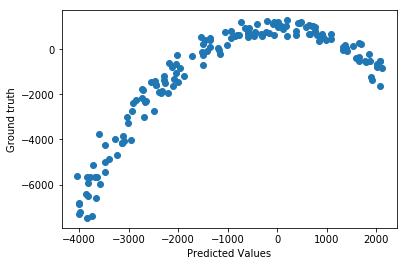

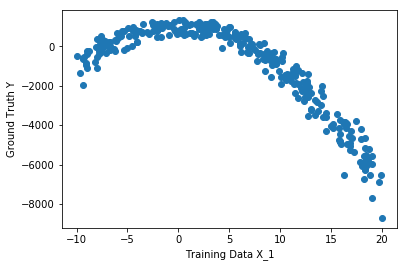

The model should be a quadratic model


In [771]:
# Bonus
# Show a graph between the predicted Y^ and the Ground truth Y
from matplotlib import pyplot as plt
plt.scatter(predicted, truevalues)
plt.xlabel("Predicted Values")
plt.ylabel("Ground truth")
plt.show()
# Try to plot Y vs X_1 in train set.
plt.scatter(train_data[:,1],train_data[:,0])
plt.xlabel("Training Data X_1")
plt.ylabel("Ground Truth Y")
plt.show()
# can it help you improve your model?
print "The model should be a quadratic model"
# construct the better model.

# Logistic Regression

Generaly, Logistic Regression is used to predict categorial variables. For the simple problem of 2-way classification, the output $\hat{y_i}$ is modeled as the probability that $\{X_i\}$ belongs to class $1$ (given two classes $0$, and $1$).

$$ P( \{X_i\} \in Set_1 ) = \hat{y_i}, $$ ( $y_i$ is the actual label; $y_i \in \{ 0,1 \}$ )


$\hat{y_i}$ is typically modeled as the output of a sigmoid on a linear combination of the input feature $\{X_i\}$:

$$ \mathbf {\hat{y}} = \sigma(X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}) = \sigma_\beta(X)$$

Now, The likelihood of some given data for this model can be written as:

$${\displaystyle {\begin{aligned}L(\beta |x)&=Pr(Y|X;\beta )\\&=\prod _{i}Pr(y_{i}|x_{i};\beta )\\&=\prod _{i}\sigma_{\beta }(x_{i})^{y_{i}}(1-\sigma_{\beta }(x_{i}))^{(1-y_{i})}\end{aligned}}}$$

Unlike in the case of Linear regression, this equation has no closed form solution. Hence we will use gradient descent on the negative log-likelihood $J(\beta)$ to find the optimal $\beta$

$$
J(\beta) = \sum_i{\big( y_ilog(\hat{y_i})+ (1-y_i)log(1-\hat{y_i}) \big) }
$$

with the update equation:

$$
\beta_j = \beta_j + \alpha \times \frac{ \partial J(\beta)}{\partial \beta}
$$

## Question 2

a) You will write the code to find the optimal logistic regression model for the given data. The data contains 3 columns, each for $y, X_{1}$, and $X_{2}$ respectively. For the rate of learning $\alpha$ use a linearly decaying policy, or step-wise reduction policy. 

$$ {\displaystyle \mathbf {y} =\sigma \big( {\boldsymbol {\beta_{1} }}X_1+ {\boldsymbol {\beta_{2} }}X_2+{\boldsymbol {\beta_{0} }}+{\boldsymbol {\varepsilon }}} \big) $$

b) Explore possible methods of adjusting the learning rate $\alpha$ 

In [776]:
# Load the train dataset 
train_data = np.load('utils/assign_1_data_2_train.npy')
count_training_data = int(0.80 * len(train_data))
training_data = train_data[0:count_training_data]
validation_data = train_data[count_training_data:len(train_data)]
# now write the code to find the parameters of the optimization.

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

def decision_boundary(prob):
  return 1 if prob >= .5 else 0

def classify(preds):
  decision = np.vectorize(decision_boundary)
  return decision(preds).flatten()

def update_weights(features, labels, weights, lr):
    N = len(features)
    #Get Predictions
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - labels)
    #3 Take the average cost derivative for each feature
    gradient /= N
    gradient *= lr
    weights -= gradient
    return weights

def cost_function(features, labels, weights):
    observations = len(labels)
    predictions = predict(features, weights)
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)
    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)
    #Take the sum of both costs
    cost = class1_cost - class2_cost
    #Take the average cost
    cost = cost.sum()/observations
    return cost

def train(train_features, train_labels, validation_features, validation_labels, weights, lr, iters):
    training_cost_history = []
    validation_cost_history = []
    
    for i in range(iters):
        weights = update_weights(train_features, train_labels, weights, lr)
        lr = lr * ((0.0001 * i + 1) ** -0.75)
        #Calculate error
        cost1 = cost_function(train_features, train_labels, weights)
        training_cost_history.append(cost1)
        cost2 = cost_function(validation_features, validation_labels, weights)
        validation_cost_history.append(cost2)

        # Log Progress
        if i % 100 == 0:
            print "iter: "+str(i) + " training cost: "+str(cost1)+" validation cost: "+str(cost2)
    return weights, cost_history

beta1 = 0.3
beta2 = 0.2
beta0 = 0.4
weights = np.array([
    [beta0],
    [beta1],
    [beta2]
])
train_features = np.delete(training_data,0,1)
train_labels = training_data[:,0].reshape(len(training_data),1)
bias = np.ones(shape=(len(train_features),1))
train_features = np.append(bias, train_features, axis=1)

validation_labels = validation_data[:,0].reshape(len(validation_data),1) #checking on validation
validation_features = np.delete(validation_data,0,1)
bias = np.ones(shape=(len(validation_features),1))
validation_features = np.append(bias, validation_features, axis=1)

In [780]:
# test on a validation part every 't' iterations to find when you start overfitting.
# t = ?
iters = 1201
lr = 0.02
[weights, cost_history] = train(train_features, train_labels, validation_features, validation_labels, weights, lr, iters)
plt.plot()
print "The training cost and validation cost remains constant after 900 iteration, so setting 't' = 900"
# Now for 't' iterations train on the entire dataset for testing on the test_data

def fulltrain(features, labels, weights, lr, iters):
    cost_history = []
    
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        lr = lr * ((0.0001 * i + 1) ** -0.75)
        #Calculate error
        cost1 = cost_function(features, labels, weights)
        cost_history.append(cost1)
    return weights, cost_history

train_features = np.delete(train_data,0,1)
train_labels = train_data[:,0].reshape(len(train_data),1)
bias = np.ones(shape=(len(train_features),1))
train_features = np.append(bias, train_features, axis=1)
[weights, cost_history] = fulltrain(train_features, train_labels, weights, lr, 900)



iter: 0 training cost: 0.222894772695 validation cost: 0.204037011109
iter: 100 training cost: 0.215424905977 validation cost: 0.196989232038
iter: 200 training cost: 0.212079167655 validation cost: 0.193799053356
iter: 300 training cost: 0.211286249803 validation cost: 0.193039787459
iter: 400 training cost: 0.211189484652 validation cost: 0.192947043068
iter: 500 training cost: 0.211183538437 validation cost: 0.192941343316
iter: 600 training cost: 0.21118335545 validation cost: 0.192941167912
iter: 700 training cost: 0.211183352627 validation cost: 0.192941165206
iter: 800 training cost: 0.211183352605 validation cost: 0.192941165185
iter: 900 training cost: 0.211183352605 validation cost: 0.192941165185
iter: 1000 training cost: 0.211183352605 validation cost: 0.192941165185
iter: 1100 training cost: 0.211183352605 validation cost: 0.192941165185
iter: 1200 training cost: 0.211183352605 validation cost: 0.192941165185
The training cost and validation cost remains constant after 900

In [781]:
# find the accuracy on the test set:
test_data = np.load('utils/assign_1_data_2_test.npy')
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

actual_labels = test_data[:,0]
features = np.delete(test_data,0,1)
bias = np.ones(shape=(len(features),1))
features = np.append(bias, features, axis=1)
predicted_labels = classify(predict(features, weights))
print "The accuracy obatined on test data is "+str(accuracy(predicted_labels,actual_labels))


The accuracy obatined on test data is 0.833333333333


In [412]:
# Bonus
# Can you adjust the learning rate alpha in a better way?
print "The learning rate alpha is adjusted as :\nalpha = alpha * ((0.0001 * i + 1) ** -0.75) \nwhere 'i' denotes the iteration number"

The learning rate alpha is adjusted as :
alpha = alpha * ((0.0001 * i + 1) ** -0.75) 
where 'i' denotes the iteration number


# EM algorithm

This is a general framework for likelihood-based parameter estimation.
A basic outline of this algorithm is:

* start with initial guesses of parameters

* E step: estimate memberships given params

* M step: estimate params given memberships

* Repeat until convergence

** Refer to [this link](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf) (9.2.2) .**


## Question 3

Let ${\displaystyle \mathbf {x} =(\mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{n})} $ be a sample of $n$ independent observations from a mixture of two multivariate normal distributions of dimension $d$ , and let ${\displaystyle \mathbf {z} =(z_{1},z_{2},\ldots ,z_{n})} $ be the latent variables that determine the component from which the observation originates.

$X_i |(Z_i = 1) \sim \mathcal{N}_d(\boldsymbol{\mu}_1,\Sigma_1)$ and $X_i |(Z_i = 2) \sim \mathcal{N}_d(\boldsymbol{\mu}_2,\Sigma_2)$

The aim is to estimate the unknown parameters representing the mixing value between the Gaussians and the means and covariances of each:

$$ \theta = \big( \boldsymbol{\tau},\boldsymbol{\mu}_1,\boldsymbol{\mu}_2,\Sigma_1,\Sigma_2 \big) $$

a) Given the data, find the parameters $\theta$ using EM algorithm.



EM iteration : 0
EM iteration : 1
EM iteration : 2
EM iteration : 3
EM iteration : 4
EM iteration : 5
EM iteration : 6
EM iteration : 7
EM iteration : 8
EM iteration : 9


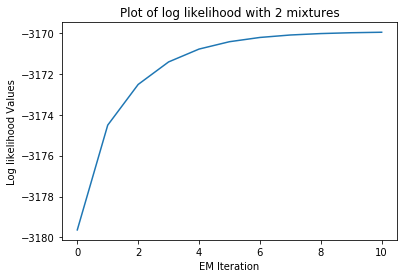

In [680]:
# Load the train dataset 
data = np.load('utils/assign_1_data_3.npy')
# The data is a 1000*2 numpy array, where each row is a independent observation, and 
# the columns are measurement in dimension x and y respectively. 
# now write the code to find the parameter theta.
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.seed(np.random.randint(0, 10))
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


def k_meansalgo(data, k):
    centroids = initialize_centroids(data, k)
    i=1
    while(i<=20):
        closest = closest_centroid(data, centroids)
        newcentroids = move_centroids(data, closest, centroids)
        centroids = newcentroids
        i = i+1
    return newcentroids, closest

def GMM_model_built(data):
    k=2
    centroids, classlabel = k_meansalgo(data, k)
    covariance, alpha = covariance_calculate(data,centroids,classlabel)
    # calculating log likelihood value
    loglikelyvalues = []
    loglikelyvalues.append(loglikelihood(data, centroids, covariance, alpha, k))
    # p(l/xi)
    # probablity that data belongs to cluster 1
    for i in range(10):
        print "EM iteration : " + str(i)
        # Estep
        prob_Data_belong_Cluster = Estep(data, centroids, covariance,alpha, k)
        prob_Data_belong_Cluster = prob_Data_belong_Cluster.reshape(data.shape[0], k)
        # Mstep
        newalpha, newcentroids, newcovariance = Mstep(data,prob_Data_belong_Cluster, k)
        # logvalues
        loglikelyvalues.append(loglikelihood(data, newcentroids, newcovariance, newalpha, k))
        centroids = newcentroids
        covariance= newcovariance
        alpha = newalpha
    plotloglikelihood(loglikelyvalues, k)
    points_closest_gaussian = closest_centroid(data, centroids)
    return alpha, centroids, covariance, points_closest_gaussian

def covariance_calculate(data,centroids, classlabel):
    covariance_matrix =[]
    alpha = []
    for i in range(len(centroids)):
        mean = centroids[i].reshape(1, centroids.shape[1])
        classdata = data[classlabel==i]
        alpha.append(classdata.shape[0]/(data.shape[0]*1.0))
        mean_matrix = np.repeat(mean, classdata.shape[0], axis=0)
        mean_differenced_data = classdata - mean_matrix
        covariance = (np.dot(mean_differenced_data.T, mean_differenced_data)) / classdata.shape[0]
        covariance_matrix.append(covariance)
    covariance_matrix = np.asarray(covariance_matrix)
    alpha = np.asarray(alpha)
    return covariance_matrix, alpha

def Estep(data, centroid, covariance, alpha, k):
    prob_Data_belong_to_Cluster = np.zeros((data.shape[0], k))
    for i in range(data.shape[0]):
        sum=0
        for j in range(k):
            y = multivariate_normal.pdf(data[i], mean=centroid[j], cov=covariance[j])
            sum = sum + alpha[j] * y

        for j in range(k):
            prob = multivariate_normal.pdf(data[i], mean=centroid[j], cov=covariance[j])
            weighted_prob = alpha[j] * prob
            normalized_prob = weighted_prob / sum
            prob_Data_belong_to_Cluster[i][j] = normalized_prob
    return prob_Data_belong_to_Cluster

def Mstep(data, prob_Data_belong_Cluster, k):
    dim =2
    newalpha = []
    for i in range(k):
        newalpha.append(np.mean(prob_Data_belong_Cluster[:, i]))
    newalpha = np.asarray(newalpha)

    newcentroids_music = []
    for i in range(k):
        sum = np.dot(data.T, prob_Data_belong_Cluster[:, i])
        newcentroids_music.append(sum / np.sum(prob_Data_belong_Cluster[:, i]))
    newcentroids_music = np.asarray(newcentroids_music)
    newcentroids_music = newcentroids_music.reshape(k, dim)

    newcovariance_music = []
    for i in range(k):
        denominator = np.sum(prob_Data_belong_Cluster[:, i])
        sum = np.zeros((dim, dim), dtype=np.float16)
        for j in range(data.shape[0]):
            difference_sample_and_mean = data[j,:] - newcentroids_music[i, :]
            difference_sample_and_mean = difference_sample_and_mean.reshape(1,dim)
            covariance = np.dot(difference_sample_and_mean.T, difference_sample_and_mean)
            covariance_scaled = covariance * prob_Data_belong_Cluster[j, i]
            sum = sum + covariance_scaled
            overall_covariance = sum / (denominator*1.0)
        newcovariance_music.append(overall_covariance)
    newcovariance_music = np.asarray(newcovariance_music)
    #newcovariance_music = newcovariance_music + (10e-6)*np.identity(dim)
    return newalpha, newcentroids_music, newcovariance_music

from scipy.stats import multivariate_normal

def loglikelihood(data,centroids, covariance, alpha,k):
    y = np.zeros(k)
    logsum = 0.0
    for i in range(data.shape[0]):
        for j in range(k):
            y[j] = multivariate_normal.pdf(data[i], mean=centroids[j], cov=covariance[j])
            y[j] = y[j] * alpha[j]
        sumy = np.sum(y)
        logsum = logsum + np.log10(sumy)
    return logsum

def plotloglikelihood(loglikelyvalues, k):  
    plt.plot(loglikelyvalues)
    plt.title("Plot of log likelihood with "+str(k)+" mixtures")
    plt.xlabel("EM Iteration")
    plt.ylabel("Log likelihood Values")
    plt.show()
    
alpha,centroid,covariance, points_closest_gaussian = GMM_model_built(data)

In [683]:
# Parameters are given by:
print "The mixing value between the gaussians : "+ str(alpha)
print "The mean for gaussian 1 : "+str(centroid[0])
print "The mean for gaussian 2 : "+str(centroid[1])
print "\nThe covariance for gaussian 1 : \n"+str(covariance[0])
print "\nThe covariance for gaussian 2 : \n"+str(covariance[1])

The mixing value between the gaussians : [ 0.49605604  0.50394396]
The mean for gaussian 1 : [ 49.90100636  75.58593604]
The mean for gaussian 2 : [ 60.45677061  55.32733967]

The covariance for gaussian 1 : 
[[ 20.11826113   2.22644475]
 [  2.22644475  89.6045536 ]]

The covariance for gaussian 2 : 
[[ 92.5735717   51.67281385]
 [ 51.67281385  58.35901883]]


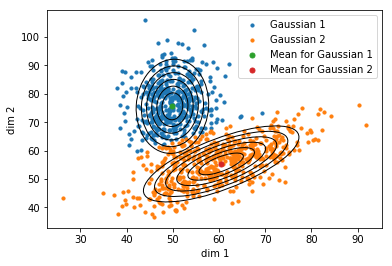

In [773]:
# Visualize the entire data by plotting them as points in a 2-D canvas.  
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 0.5 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(2, 8):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle,  fill = False, **kwargs))
        

plt.scatter(data[points_closest_gaussian == 0,0], data[points_closest_gaussian == 0,1], label = "Gaussian 1", s=10)
plt.scatter(data[points_closest_gaussian == 1,0], data[points_closest_gaussian == 1,1], label = "Gaussian 2", s=10)

# Show the estimated means and the standard deviations.

plt.scatter(centroid[0,0], centroid[0,1], label="Mean for Gaussian 1", marker='o', s=25)
plt.scatter(centroid[1,0], centroid[1,1], label="Mean for Gaussian 2", marker='o', s=25)
draw_ellipse(centroid[0], covariance[0])
draw_ellipse(centroid[1], covariance[1])

plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.legend()

plt.show()

# Clustering

For clustering we covered two algorithms

1) K-means : An iterative method to get 'K' clusters, initializing them randomly

2) Hirarchical : An iterative method to get a dendogram of clustering with various numbers of cluster centers.

### K-means Clustering

We initialize $K$ cluster centers $\{ c_1,c_2 ,... c_k\}$for $K$-clusters randomly. All the data points are assigned a cluster index $D_i \in \{ 1,2,...,k\}$, based on the closest cluster center to each point.

Now, for each cluster, the cluster centers are re-evaluated as the mean of all the points in the center.

$$
c_i = mean(\{ X_j | D_j = i \})
$$
This process continues till convergence.


## Question 4

The dataset contains 1000  color images.Convert them to grayscale images. We need to cluster them into various $n$ clusters based on the similarity of their histograms. For each image, find the histogram with bin size 25 (last bin of 30;i.e.225-255;giving you 10 bins). Now treating each of these bins as seperate dimensions, find:

a) Cluster Centers for $n = 5$ clusters, with $L_2$ distance criteria for measuring distance between a pair of images.

b) **Bonus**: Use Earth Movers Distance in the above problem.

In [573]:
# For this problem we will be using the 1000 test images of CIFAR-10 dataset.
## Load the data from the following link
# https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

testdataset = unpickle("cifar-10-batches-py/test_batch")
data = testdataset['data'][0:1000]

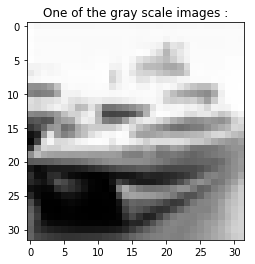

In [622]:
# Convert it to grayscale values
from matplotlib import cm

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imagedata = data.reshape(1000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
imagedata = np.array(imagedata)

grayimages = rgb2gray(imagedata)
grayimages = grayimages.astype("uint8")
plt.imshow(grayimages[1], cmap = plt.get_cmap('gray'))
plt.title('One of the gray scale images :')
plt.show()

In [618]:
# find the histograms and get a 10-dimensional representation of each images.
histogram_data = []
for i in range(len(grayimages)) :
    hist, bin_edges = np.histogram(grayimages[i], bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255])
    histogram_data.append(hist)

histogram_data = np.array(histogram_data)

In [752]:
# Use K-means to find  out the number of cluster centers.
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.seed(1900)
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

def k_meansalgo(data, k):
    centroids = initialize_centroids(data, k)
    while(1):
        closest = closest_centroid(data, centroids)
        newcentroids = move_centroids(data, closest, centroids)
        if(np.allclose(np.array(centroids), np.array(newcentroids))):
            break
        else :
            centroids = newcentroids
    return newcentroids, closest

centroids, classlabel = k_meansalgo(histogram_data, 5)
print "1st cluster mean"
print centroids[0]
print "\n2nd cluster mean"
print centroids[1]
print "\n3rd cluster mean"
print centroids[2]
print "\n4th cluster mean"
print centroids[3]
print "\n5th cluster mean"
print centroids[4]

1st cluster mean
[  14.99487179   40.47692308   73.98461538  127.96923077  250.60512821
  280.38974359  143.38461538   53.2          25.25128205   13.74358974]

2nd cluster mean
[  17.88586957   62.82065217  184.76630435  295.02173913  221.8423913
  104.68478261   59.5          37.69565217   23.61413043   16.16847826]

3rd cluster mean
[ 115.15498155  167.25830258  170.84870849  132.62361624  107.49077491
   95.22140221   82.20295203   61.16236162   49.8597786    42.17712177]

4th cluster mean
[  22.05042017   41.43697479   75.12605042   82.26890756   82.40336134
   77.32773109   74.16806723   76.71428571  161.21848739  331.28571429]

5th cluster mean
[  16.98701299   40.24242424   67.54978355   88.6969697   104.58874459
  130.30735931  220.46753247  217.67532468  106.45887446   31.02597403]


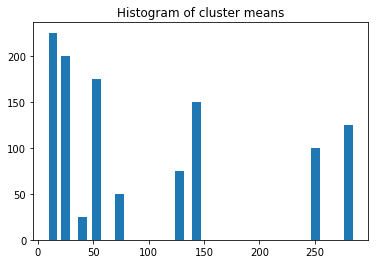

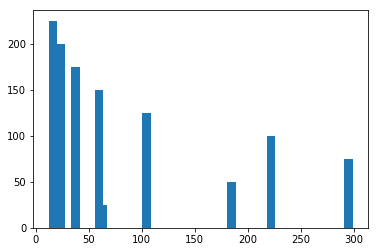

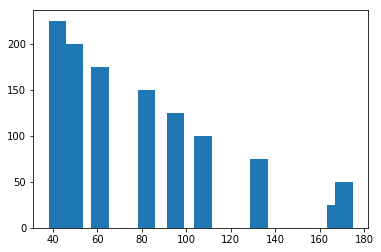

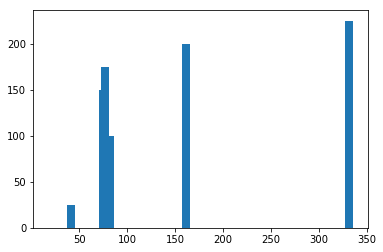

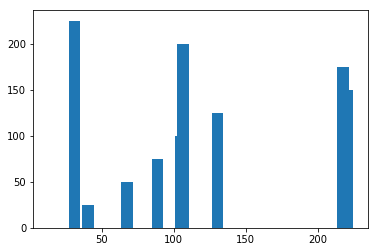

In [756]:
# Visualize cluster means to see what they look like.
plt.title("Histogram of cluster means")
plt.bar(centroids[0],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225],width=8)
plt.show()
plt.bar(centroids[1],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225],width=8)
plt.show()
plt.bar(centroids[2],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225],width=8)
plt.show()
plt.bar(centroids[3],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225],width=8) 
plt.show()
plt.bar(centroids[4],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225],width=8) 
plt.show()

# References

Useful references will be added shortly.

1) Linear Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

2) Logistic Regression
  * [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
  * [Win Vector Blog](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)
  * [Renselaer Course Slides](http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf)
  
3) EM
  * [Cambridge Tutorial](http://www.cs.huji.ac.il/~yweiss/emTutorial.pdf)
  * [Chapter 9 - Pattern Recognition and Machine Learning by Christopher M. Bishop](http://www.rmki.kfki.hu/~banmi/elte/bishop_em.pdf)
  * [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
  
4) K-means
  * [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)